In [ ]:
#Plot cross validationd, ROC plot and Confusion Matrix

In [2]:

%run ../src/models/train_dummy.py

fitting: dummy_clf


In [3]:
%run ../src/models/train_simple_model.py

loaded pipeline: log_pipeline
loaded pipeline: cluster_simil_
loaded pipeline: default_pipeline
loaded simple pipeline: preprocessing
Training: log_search --- 626.9530861377716 seconds ---


In [4]:
%run ../src/models/train_interaction_model.py

loaded pipeline: interaction_pipeline
loaded interaction pipeline: preprocessing_int
Training: log_search_int --- 667.3870258331299 seconds ---


In [8]:
best_simple_model = log_search.best_estimator_

best_interaction_model = log_search_int.best_estimator_

In [9]:

##Cross Validations
import pandas as pd
from sklearn.model_selection import cross_val_score

dummy_scores_cv = cross_val_score(dummy_clf
                                    , x_train, y_train
                                    , scoring="recall"
                                    , cv=10
                                    )

log_scores_cv = cross_val_score(best_simple_model
                                    , x_train, y_train
                                    , scoring="recall"
                                    , cv=10
                                    )

log_scores_cv_int = cross_val_score(best_interaction_model
                                    , x_train, y_train
                                    , scoring="recall"
                                    , cv=10
                                    )


scores_cv = pd.DataFrame({ 'Dummy Model': dummy_scores_cv, 'Simple Model': log_scores_cv, 'Interaction Model': log_scores_cv_int})

/var/folders/kc/z233bvvn0y7cp6460591q3_c0000gn/T/ipykernel_12836/2864895543.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  box.text(xtick,scores_cv.median()[xtick]*(1.03) ,scores_cv.median().round(2)[xtick],


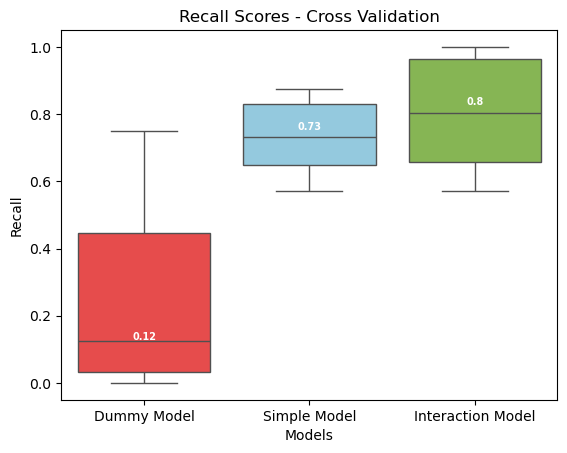

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt


my_pal = { 'Dummy Model':'#FF3333'  , 'Simple Model':  "skyblue", 'Interaction Model':'#87c544'}
box = sns.boxplot(scores_cv, palette=my_pal)
box.set_ylabel("Recall")
box.set_xlabel("Models")
box.set_title("Recall Scores - Cross Validation")


for xtick in box.get_xticks():
    box.text(xtick,scores_cv.median()[xtick]*(1.03) ,scores_cv.median().round(2)[xtick],
            horizontalalignment='center',size='x-small',color='w',weight='semibold')

Text(0.5, 1.0, 'Interaction Model')

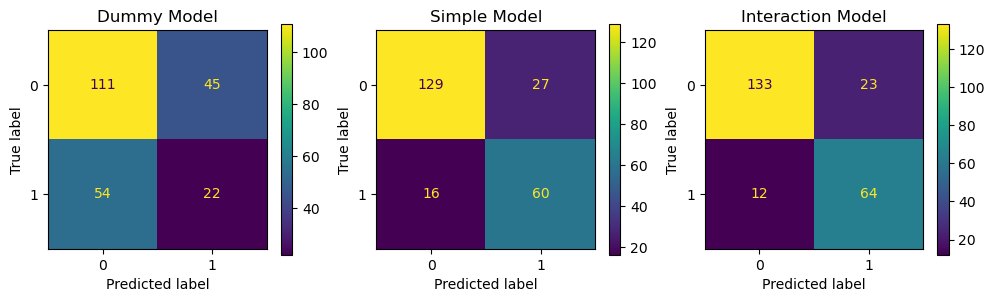

In [12]:
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

dummy_matrix = confusion_matrix(y_train,Y_hat_dummy)
log_matrix = confusion_matrix(y_train, best_simple_model.predict(x_train))
log_matrix_int = confusion_matrix(y_train, best_interaction_model.predict(x_train))

fig, axs = plt.subplots(1, 3 , figsize=(12, 3))

dummy_plot = ConfusionMatrixDisplay(confusion_matrix=dummy_matrix)
dummy_plot.plot(ax=axs[0])
dummy_plot.ax_.set_title("Dummy Model")

log_plot = ConfusionMatrixDisplay(confusion_matrix=log_matrix)
log_plot.plot(ax=axs[1])
log_plot.ax_.set_title("Simple Model")

log_int_plot = ConfusionMatrixDisplay(confusion_matrix=log_matrix_int)
log_int_plot.plot(ax=axs[2])
log_int_plot.ax_.set_title("Interaction Model")


In [13]:
#The ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train, best_simple_model.predict_proba(x_train)[:,1])

int_fpr, int_tpr, int_thresholds = roc_curve(y_train, best_interaction_model.predict_proba(x_train)[:,1])

In [14]:
from sklearn.metrics import roc_auc_score

auc_score = roc_auc_score(y_train, best_simple_model.predict_proba(x_train)[:,1])
auc_score_int = roc_auc_score(y_train, best_interaction_model.predict_proba(x_train)[:,1])


0.8695175438596492 0.9154014844804318


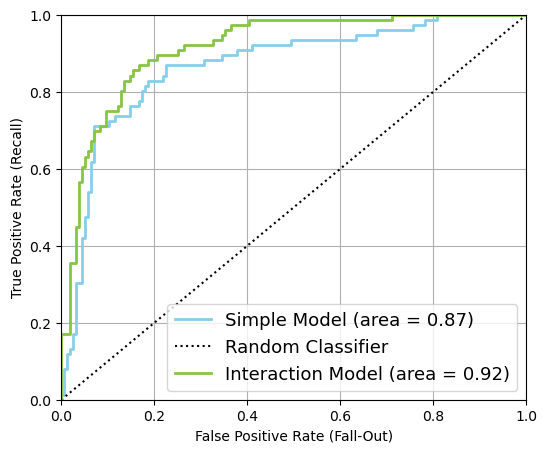

In [15]:
import matplotlib.patches as patches

plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting
plt.plot(fpr, tpr, linewidth=2, color=  "skyblue", label="Simple Model (area = %0.2f)" % auc_score )
plt.plot([0, 1], [0, 1], 'k:', label="Random Classifier")
plt.plot(int_fpr, int_tpr, color='#87c544', linewidth=2, label="Interaction Model (area = %0.2f)" % auc_score_int)

# extra code – just beautifies and saves Figure 3–7
#plt.gca().add_patch(patches.FancyArrowPatch(
#    (0.20, 0.89), (0.07, 0.70),
#    connectionstyle="arc3,rad=.4",
#    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
#    color="#444444"))
#plt.text(0.12, 0.71, "Higher\nthreshold", color="#333333")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)
#save_fig("roc_curve_plot")

plt.show()

I conclude that Interaction Model is better 9.5% than Simple Model by its Recall median.